# Experimental Design in Python
Course Description
Data is all around us and can help us to understand many things. Making a pretty graph is great, but how can we tell the difference between a few outliers on a graph and a real, reliable effect? Is a trend that we see on a graph a reliable result or just random chance playing tricks? In this course, you will learn how to interrogate datasets in a rigorous way, giving clear answers to your questions. You will learn a range of statistical tests, how to apply them, how to understand their results, and how to deal with their shortcomings. Along the way, you will explore Olympic athlete data and the differences between populations of continents.

## Getting started with plotnine
Let's do some exploratory data analysis! In this exercise, you have been provided with a People dataset containing the Height in cm and Weight in kg of two Sample groups.

We'll start by creating a simple scatter plot, allowing you to see how these variables relate to one another. You'll need to import the plotnine package, then you'll make your first plot.

In [43]:
import plotnine as p9
import pandas as pd 
print('modulos carregados')

modulos carregados


In [44]:
People = pd.DataFrame(data= {'Sex': ["Male","Male","Female","Female"] ,"Height": [183, 179, 160, 172],"Weight": [82,75.1, 50, 58.7]})


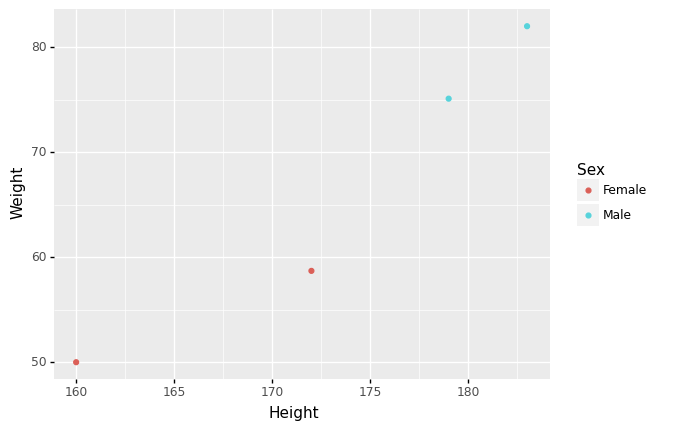

In [45]:
# Create the scatter plot
print(p9.ggplot(People,)+ p9.aes(x='Height', y='Weight', color='Sex')+ p9.geom_point())

## Boxplots
Now we'll try creating boxplots, which are a great way to get an overview of a distribution. We'll be using the same People dataset containing the Weight in kg and the Height in cm from two Samples.

You'll make two boxplots: one for Weight and one for Height. Both plotnine and pandas have been imported as p9 and pd.

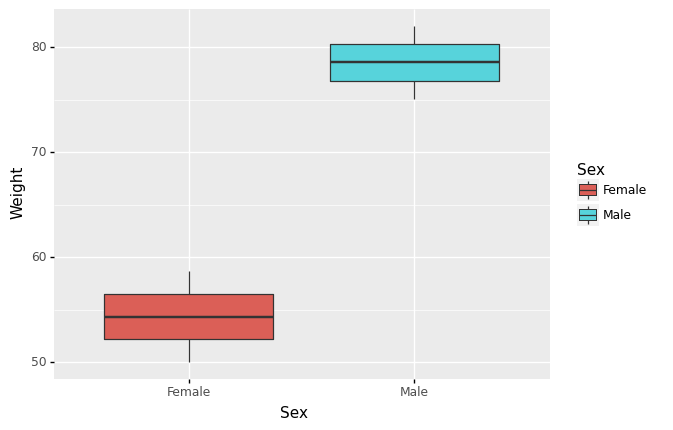

In [46]:
# Create boxplot of Weight
print(p9.ggplot(People)+ p9.aes(x='Sex', y='Weight', fill='Sex')+ p9.geom_boxplot())

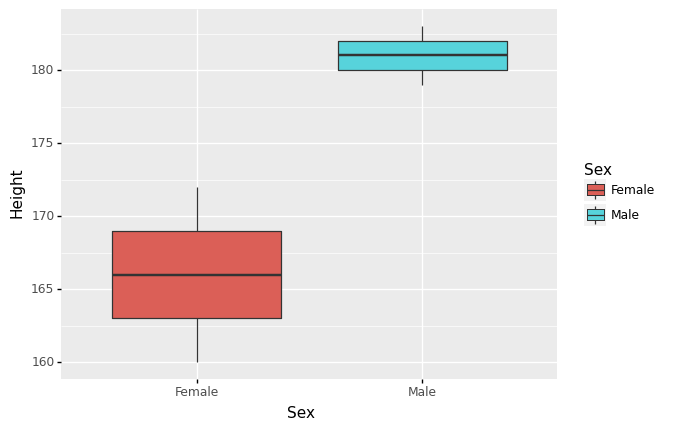

In [47]:
# Create boxplot of Height
print(p9.ggplot(People)+ p9.aes(x='Sex', y='Height', fill='Sex')+ p9.geom_boxplot())

## Density plots
Now you'll be making a third type of graph: a density plot. This type of plot allows us to visualize a distribution in a somewhat detailed way. You'll make two density plots using the People dataset; one for Height and one for Weight.

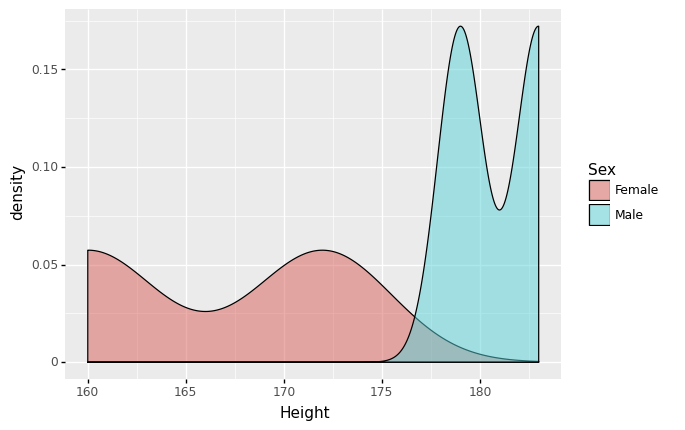

In [48]:
# Create density plot of Height
print(p9.ggplot(People)+ p9.aes(x='Height', fill='Sex')+ p9.geom_density(alpha=0.5))

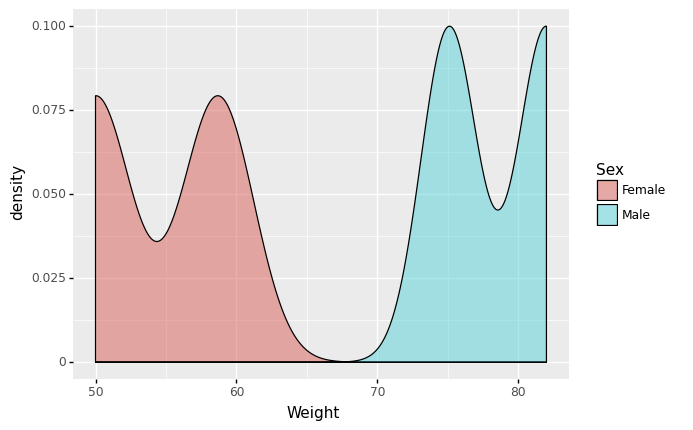

In [49]:
# Create density plot of Weight
print(p9.ggplot(People)+ p9.aes(x='Weight', fill='Sex')+ p9.geom_density(alpha=0.5))

### 1. Our first hypothesis test - Student's t-test
It is possible to find all kinds of patterns in data.

### 2. From observed pattern to reliable result
Some are expected, while others are more surprising. However, most datasets also include random variation. Knowing this, how can we go from a simple observation to a reliable result?

### 3. Are these groups different?
Let's say we have the body weights of two samples from two groups of people, A and B. When we plot it, we seem to see a trend, where the group mean for sample B is larger than that for sample A. Is this difference real, or simply random variation?

### 4. Two hypotheses
To draw a conclusion, we will need to distinguish between two cases or hypotheses. In statistics, our starting point is the "null hypothesis": that there isn't anything interesting happening and the observed patterns are just the product of random chance. With enough evidence, we can reject the null hypothesis and turn to the more interesting "alternative hypothesis": that the difference between these samples represents a real difference between the populations.

### 5. Some statistical terms
But when do we know to reject the null hypothesis? Here we turn to two statistics. The p-value represents the likelihood that the distribution of values observed would occur if the null hypothesis were correct. We can't be 100 percent sure that our pattern couldn't have emerged due to random chance but we can quantify the probability that random chance would produce a given pattern; this is the p-value. The smaller the p-value is, the less likely it is that the null hypothesis can account for our observations. When p falls below a critical value, which we call alpha, we reject the null hypothesis. A standard value for alpha is 0 point 05. So, below a 5 percent probability that random chance would produce the pattern observed, it's usually considered safe to reject the null hypothesis.

### 6. Student's t-test
To compare two sets of values for a continuous variable, we will use Student's t-test. This test was invented by William Sealy Gosset as a means of monitoring beer quality for Guinness. A noble endeavor, to be sure! There are two basic types. A one-sample t-test will test the likelihood that the mean of a population is different from a given value. A two-sample t-test will test the likelihood that there is a difference between the means of two populations. For a two-sample t-test, we'll use the function ttest-underscore-ind and we'll give it two arrays. This yields an array with the p-value at index 1.

### 7. Implementing a one-sample t-test
For the one-sample t-test, we first import stats. Then we use the ttest-underscore-1sample function, which takes two arguments. The first is our sample array, taken from our DataFrame, and the second is a number we want to compare. Finally, using a standard alpha value of 0 point 05, we test whether our p-value falls under alpha.

### 8. Implementing a two-sample t-test
Now, with the two-sample t-test, we can answer whether the members of group B are heavier than the members of group A? We take two arrays from our DataFrame, use them as the ttest function arguments, save the result as t-underscore-result, and then test whether our p-value falls under alpha. It does! It seems that this difference may have some validity.

### Your first t-test
Now you will perform your first statistical test! We want to compare the mean heights in cm of the Sample_A group with a given value. We want to see whether the mean weight of the people in this sample is significantly different from the chosen cut-off point of 65 kg. You'll use a one-sample t-test, which allows you to compare the mean of a sample with a chosen value. You'll perform this test on the sample provided versus the crucial value of 65 kg, and test its significance by comparing the value of alpha to the p-value. scipy.stats has been loaded into the workspace as stats.

In [50]:
from scipy import stats
Sample_A = [54.2, 66.4, 66.9, 64.4, 71.1]
t_result = stats.ttest_1samp(Sample_A, 65)
print(t_result)

# Test significance
alpha= 0.05
if (t_result.pvalue < alpha):
    print("mean value of Sample A differs from given value")
else:
	print("No significant difference found")

Ttest_1sampResult(statistic=-0.14187430361917347, pvalue=0.8940381290746852)
No significant difference found


### One-sample t-test
In this exercise, you will perform a one-sample t-test using the ttest_1sample() function. Using eudata, a dataset of country-level statistics, you'll be looking at the sex ratios found in the population of European countries. You'll use a one sample t-test to determine if the mean sex ratio found among European countries differs significantly from 50-50. First, you'll make some plots, then you'll perform your test. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9.

In [51]:
data = pd.read_csv('data/undata_country_profile_variables.csv')

eudata = data.loc[data.Region.isin(['SouthernEurope','WesternEurope','EasternEurope','NorthernEurope'])]
euasdata = data.loc[data.Region.isin(['SouthernEurope','WesternEurope','EasternEurope','NorthernEurope'])]
euasdata['Continent'] = 'Europe'
euasdata2 = data.loc[data.Region.isin(['SouthernAsia','WesternAsia','South-easternAsia','EasternAsia', 'CentralAsia'])]
euasdata2['Continent']= 'Asia'

<ipython-input-51-96cbfe497728>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-51-96cbfe497728>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
euasdatafinal = euasdata.append(euasdata2).copy()

In [53]:
#eudata = pd.read_csv('data/undata_country_profile_variables.csv', usecols=['country', 'Sex ratio (m per 100 f, 2017)'])
eudata = eudata[['country', 'Sex ratio (m per 100 f, 2017)']]
eudata.columns = (['country', 'sex_ratio'])
eudata.dropna(inplace=True)


In [54]:
euasdatafinal = euasdatafinal[['country', 'Sex ratio (m per 100 f, 2017)','Continent']]
euasdatafinal.columns = (['country', 'sex_ratio', 'continent'])
euasdatafinal.dropna(inplace=True)

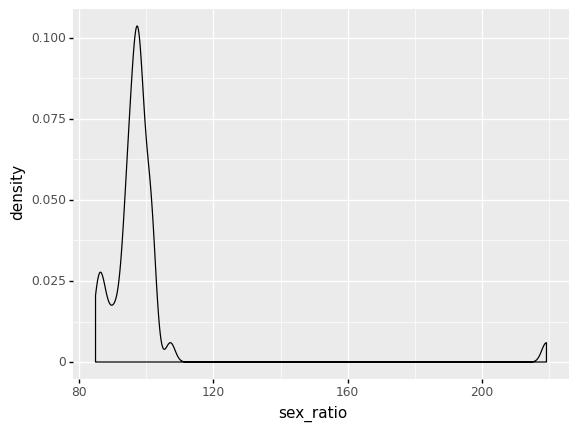

In [55]:
# Create the density plot
print(p9.ggplot(eudata)+ p9.aes(x='sex_ratio')+ p9.geom_density(alpha=0.5))

### One-sample t-test
In this exercise, you will perform a one-sample t-test using the ttest_1sample() function. Using eudata, a dataset of country-level statistics, you'll be looking at the sex ratios found in the population of European countries. You'll use a one sample t-test to determine if the mean sex ratio found among European countries differs significantly from 50-50. First, you'll make some plots, then you'll perform your test. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9.

In [56]:
# Create the density plot
(p9.ggplot(eudata)+ p9.aes('Sex_ratio')+ p9.geom_density(alpha=0.5))

# Perform the one-sample t-test
t_result= stats.ttest_1samp(eudata.sex_ratio, 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Sex ratios are significantly biased")
else:
    print("No significant bias found")

Ttest_1sampResult(statistic=-0.5356948819785791, pvalue=0.5946955313654608)
No significant bias found


## Two-sample t-test
Now we'll compare two sets of samples. Again, we'll be looking at the Sex_ratio (number of males per 100 females) found in different countries, but this time we're going to compare the Sex_ratio of European countries with Asian countries. Does the mean sex ratio differ between the two continents? A two-sample t-test can tell us whether the means of two samples differ significantly. The dataset is provided as euasdata. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9. You'll do some exploratory data analysis, then compare the groups via a statistical test.

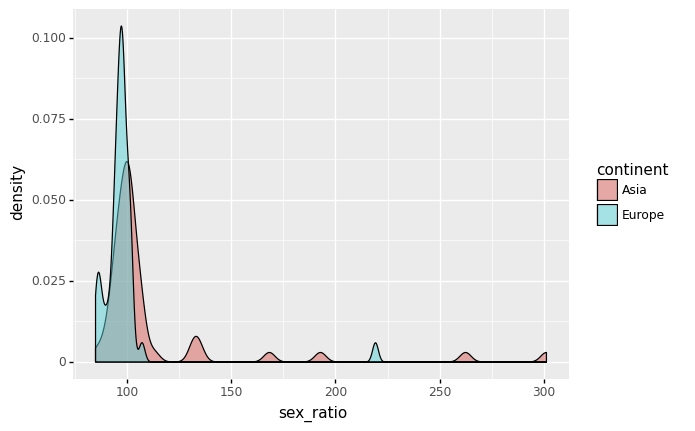

In [57]:
print(p9.ggplot(euasdatafinal)+ p9.aes('sex_ratio', fill='continent')+ p9.geom_density(alpha=0.5))

Now we'll compare two sets of samples. Again, we'll be looking at the Sex_ratio (number of males per 100 females) found in different countries, but this time we're going to compare the Sex_ratio of European countries with Asian countries. Does the mean sex ratio differ between the two continents? A two-sample t-test can tell us whether the means of two samples differ significantly. The dataset is provided as euasdata. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9. You'll do some exploratory data analysis, then compare the groups via a statistical test.

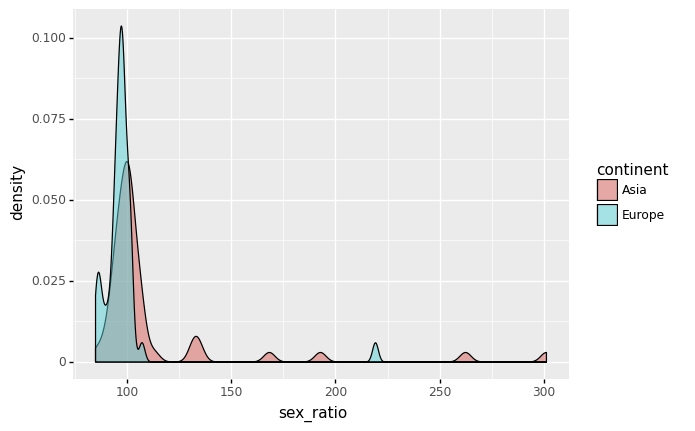


Ttest_indResult(statistic=-2.1196552594510925, pvalue=0.03661463597787139)
Europe and Asia have different mean sex ratios


In [58]:
# Create the density plot
print(p9.ggplot(euasdatafinal)+ p9.aes('sex_ratio', fill="continent")+ p9.geom_density(alpha=0.5))

# Create two arrays
Europe_Sex_ratio = euasdatafinal[euasdatafinal.continent == "Europe"].sex_ratio
Asia_Sex_ratio = euasdatafinal[euasdatafinal.continent == 'Asia'].sex_ratio

# Perform the two-sample t-test
t_result= stats.ttest_ind(Europe_Sex_ratio, Asia_Sex_ratio)
print(t_result)

# Test significance
alpha= 0.05
if (t_result.pvalue < alpha):
    print("Europe and Asia have different mean sex ratios")
else: print("No significant difference found")

*You can see how the sex ratios of Asian countries differ from European ones.*

## Chi-square test
In this exercise, you will be working with the Olympics dataset. Here, we're going to look at the sex ratio of the American Olympic squads. Is a bias present? That is to say, does the ratio of male to female athletes significantly depart from 50-50? To test this, you'll need to perform a Chi-square test on the Sex data. Data on American athletes is provided as athletes. pandas, and plotnine have been loaded into the workspace as pd and p9.

In [60]:
# Extract sex ratio
sexratio = pd.read_csv('data/olyathswim.csv')['Sex'].value_counts()
print(sexratio)
# Perform Chi-square test
chi= stats.chisquare(sexratio)
print(chi)

# Test significance
alpha= 0.05
if chi.pvalue < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

M    40303
F    21516
Name: Sex, dtype: int64
Power_divergenceResult(statistic=5709.431873695789, pvalue=0.0)
Difference between sexes is statistically significant


*Our Chi-square test shows that there are significantly more men than women on the American Olympic team.*

## Fisher's exact test
Now, you'll work with the Olympics dataset to look at the relative success of the American swimming and athletics teams. Whether each athlete received a medal is coded as True or False in the MedalTF column of athletes. Do a larger proportion of swimming or athletics participants come home with medals? A Fisher exact test is a useful way to compare proportions of samples falling into discrete categories. To test this, you'll need to perform a Fisher exact test on MedalTF in relation to Sport. pandas and plotnine have already been imported as pd and p9.

In [61]:
athlets = pd.read_csv('data/olyathswim.csv')
athlets.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [65]:
athlets.Medal.value_counts()

Gold      2438
Silver    2327
Bronze    2252
Name: Medal, dtype: int64

In [69]:
import numpy as np
athlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61819 entries, 0 to 61818
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  61819 non-null  int64  
 1   Name        61819 non-null  object 
 2   Sex         61819 non-null  object 
 3   Age         60178 non-null  float64
 4   Height      52057 non-null  float64
 5   Weight      51405 non-null  float64
 6   Team        61819 non-null  object 
 7   NOC         61819 non-null  object 
 8   Games       61819 non-null  object 
 9   Year        61819 non-null  int64  
 10  City        61819 non-null  object 
 11  Sport       61819 non-null  object 
 12  Event       61819 non-null  object 
 13  Medal       7017 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.6+ MB


In [73]:
 athlets['MedalTF'] =  athlets.Medal.apply(lambda x: True if x in ['Gold', 'Silver', 'Bronze'] else False )
 # Create a table of cross-tabulations
table = pd.crosstab(athlets['MedalTF'], athlets.Sport)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions of medal winners differ significantly")
else:
    print("No significant difference in proportions of medal winners found")

Sport    Athletics  Swimming
MedalTF                     
False        34655     20147
True          3969      3048
(1.3209591287858877, 3.940350806960751e-27)
Proportions of medal winners differ significantly


## Pearson correlation
In this exercise, you will be using the Olympic athletes dataset and focusing on just one event, the men's 100 meter running race. The dataset is provided in your workspace as athletes. You're going to be looking at how the weights of competitors have changed over time. A Pearson correlation test allows us to determine whether a linear relationship exists between two variables. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9, respectively. First, you'll make some plots, then you'll see how the sprinters' weights have changed over time.

In [77]:
athlets['Event'].unique()

array(["Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Athletics Men's Shot Put", "Athletics Men's Pole Vault",
       "Athletics Men's High Jump", "Athletics Men's 1,500 metres",
       "Swimming Men's 100 metres Butterfly",
       "Swimming Men's 200 metres Butterfly",
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Athletics Men's 4 x 100 metres Relay",
       "Athletics Men's Long Jump", "Athletics Women's Javelin Throw",
       "Athletics Men's 5,000 metres", "Athletics Women's Shot Put",
       "Athletics Men's 110 metres Hurdles", "Athletics Women's Marathon",
       "Athletics Men's 100 metres",
       "Swimming Men's 100 metres Freestyle",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Athletics Men's 400 metres Hurdles", "Athletics Men's 400 metres",
       "Athlet

In [81]:
# Create the scatter plot
athlets_nona = athlets.dropna()
(p9.ggplot(athlets_nona[athlets_nona['Event'] == "Athletics Men's 100 metres"])+ p9.aes(x='Year', y='Weight', color='Event')+  p9.geom_point())
# Run the correlation test
pearson = stats.pearsonr(athlets_nona.Weight, athlets_nona.Year)
print(pearson)

# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

(0.027486469520524866, 0.031341923606227305)
Weights and year are significantly correlated


In [ ]:
# Create boxplot of Team versus Weight
plotTeamVWeight = p9.ggplot(athletes)+ p9.aes('Team','Weight')+ p9.geom_boxplot()

# Create boxplot of Sport versus Weight
plotSportVWeight = p9.ggplot(athletes)+ p9.aes('Sport','Weight')+ p9.geom_boxplot()
      
# Print plots 
print(plotTeamVWeight, plotSportVWeight)

# Create crosstabulation & print table
table = pd.crosstab(athletes.Team, athletes.Sport)
print(table)